Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn import datasets,ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.inspection import PartialDependenceDisplay




Loading the Data

In [76]:
# Veri seti iris çiçeğinin morfolojik yapısını incelemek üzere toplanmıştır.
# Veri seti, üç İris türünün (Iris setosa, Iris virginica ve Iris versicolor) her birinden 50 örnek içerir.
# Her örnekte çanak ve taç yapraklarının uzunluğu ve genişliği ölçülmüştür.
iris = datasets.load_iris(as_frame=True)



Exploratary Data Analysis

In [77]:
y = iris.target
X = iris.data


In [78]:
X,y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [79]:
X.shape,y.shape

((150, 4), (150,))

In [80]:
X_df=pd.DataFrame(X)
y_df=pd.DataFrame(y)
X_df,y_df

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
      target
 0         0

In [81]:

df = pd.merge(X_df, y_df, left_index=True, right_index=True)
df.info(),df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


(None,
 sepal length (cm)    0
 sepal width (cm)     0
 petal length (cm)    0
 petal width (cm)     0
 target               0
 dtype: int64)

In [82]:
df.duplicated().sum()
df[df.duplicated()]
data = df.drop_duplicates()
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [83]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [84]:
df.value_counts("target")

target
0    50
1    50
2    50
dtype: int64

<AxesSubplot:>

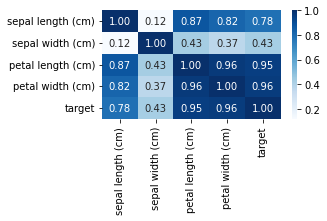

In [85]:
corrmat = df.corr()
plt.figure(figsize=(4,2))
sns.heatmap(np.abs(corrmat),annot=True,cmap="Blues",fmt="0.2f")

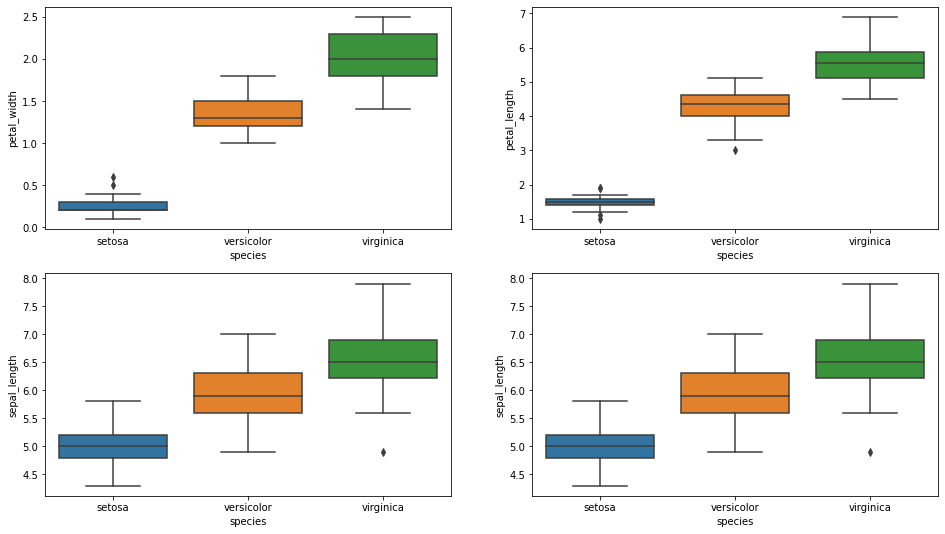

In [86]:
iris_sns = sns.load_dataset("iris")
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="petal_width", x= "species", data=iris_sns,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="petal_length", x= "species", data=iris_sns,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="sepal_length", x= "species", data=iris_sns,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="sepal_length", x= "species", data=iris_sns,  orient='v' , ax=axes[1, 1])
plt.show()

Defining Model

In [87]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=13)
X_train.shape, X_val.shape, y_train.shape, y_val.shape
y_train=y_train.astype('int')

In [88]:

LR = LogisticRegression().fit(X_train, y_train)
pred_LR=LR.predict(X_val)
metrics.accuracy_score(pred_LR, y_val)

#confusion matrix

0.9777777777777777

Feature: 0, Score: 0.38178
Feature: 1, Score: 0.88758
Feature: 2, Score: 2.28744
Feature: 3, Score: 0.98156


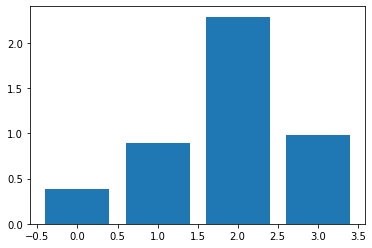

In [104]:

importance = abs(LR.coef_[0])
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [90]:

dtc = DecisionTreeClassifier().fit(X_train, y_train)
pred_dtc=dtc.predict(X_val)


metrics.accuracy_score(pred_dtc, y_val)

0.9555555555555556

Feature: 0, Score: 0.02867
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.06641
Feature: 3, Score: 0.90492


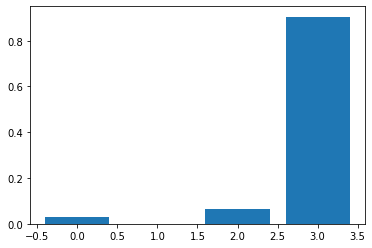

In [103]:
importance = abs(dtc.feature_importances_)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

GridSearchCV

In [95]:
pipeline= Pipeline([('scaler', StandardScaler()),('model',svm.SVC())])
pipeline_grid = GridSearchCV(pipeline, [
    
    
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'model':[svm.SVC()],
        'model__C': [1,10,20],
        'model__gamma':['auto','scale'],
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__degree':[1,2,3],
        
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'model':[LogisticRegression()],
        'model__C': [1,5,10,20],
        'model__solver':['liblinear','lbfgs'],
        'model__multi_class':['auto'],
        'model__random_state': [1,3,5,7],
    },
    {
        
        
        'scaler': [StandardScaler(), MinMaxScaler()],
        'model':[DecisionTreeClassifier()],
        'model__criterion': ["gini", "entropy"],
        'model__max_depth': [None, 2, 5, 10],
        'model__min_samples_split': [2,10, 20],
        'model__min_samples_leaf': [1,5,10],
        'model__max_leaf_nodes': [None, 5, 10, 20],
    },
   {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'model':[MLPClassifier(max_iter=10000)],
        'model__activation': ["relu", "tanh","identity", "logistic"],
        'model__solver': ["adam","lbfgs","sgd"],
        'model__hidden_layer_sizes': [(1,),(2,),(3,)],
        'model__random_state': [0],
   }
  
], cv=5,return_train_score=False)

In [96]:
pipeline_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             param_grid=[{'model': [SVC(C=1, degree=1, gamma='auto',
                                        kernel='linear')],
                          'model__C': [1, 10, 20], 'model__degree': [1, 2, 3],
                          'model__gamma': ['auto', 'scale'],
                          'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'model': [LogisticR...
                          'model__min_samples_leaf': [1, 5, 10],
                          'model__min_samples_split': [2, 10, 20],
                          'scaler': [StandardScaler(), MinMaxScaler()]},
                         {'model': [MLPClassifier(max_iter=10000)],
                          'model__activation': ['relu', 'tanh', 'identity',
                                                'logistic'],
                          'model__hidden_layer_sizes': [(1,), (2,), (3,)],
                          'model__random_state': [0],
                          'model__solver': ['adam', 'lbfgs', 'sgd'],
                          'scaler': [StandardScaler(), MinMaxScaler()]}])

In [98]:
pipeline_grid.best_params_

{'model': SVC(C=1, degree=1, gamma='auto', kernel='linear'),
 'model__C': 1,
 'model__degree': 1,
 'model__gamma': 'auto',
 'model__kernel': 'linear',
 'scaler': MinMaxScaler()}

Partial Dependence Plot   


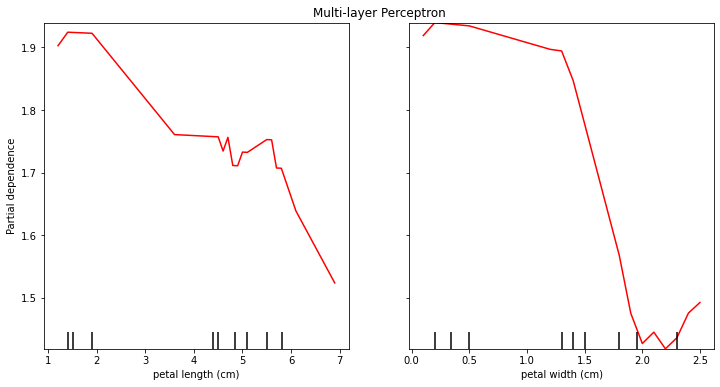

In [102]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    pipeline_grid.best_estimator_, X_val, [2,3], ax=ax, line_kw={"color": "red"},target=1
)